In [1]:
from matplotlib import gridspec
from IPython.display import Image #needed to render in notebook
from chase.base import *

def pred_quantiles(p_stop):
    return np.array([np.sum(np.cumsum(p_stop) < q) for q in [.25, .5, .75]]) + 1


FIGDEST = '/Users/markant/code/chase/chase/paper/results_figures'

# Basic predictions - switching

In [4]:
arr = np.genfromtxt('data/six_problems.csv', delimiter=',')
problems = {i: arr[i].reshape((2,2,2)) for i in range(len(arr))}

In [9]:
pars = {'theta': 10,
        'p_stay': 0.,
        'N': 1000,
        'p_switch': 1}

m = CHASEOptionalStoppingSwitchingModel(drift='ev', startdist='indifferent')

In [10]:
arr = []
for pid in problems:
    print pid
    print problems[pid]
    result = m(problems[pid], pars)
    print m.drift(0, problems[pid], pars)
    print m.drift(1, problems[pid], pars)
    print
    print 'samplesize:', result['exp_samplesize']
    print 'cp:', np.round(result['p_resp'], 3)
    arr.append(result['p_resp'][1])
    #plt.matshow(result['states_t'].transpose())


0
[[[ 3.   1. ]
  [ 0.   0. ]]

 [[ 4.   0.8]
  [ 0.   0.2]]]
-0.99999
0.99999

samplesize: [ 5000024.99923     5000024.99923206]
cp: [ 0.5  0.5]
1
[[[ 3.    0.25]
  [ 0.    0.75]]

 [[ 4.    0.2 ]
  [ 0.    0.8 ]]]
-0.363910485795
0.388171184848

samplesize: [ 115.71160856  115.71160856]
cp: [ 0.43  0.57]
2
[[[-32.    0.1]
  [  0.    0.9]]

 [[ -3.    1. ]
  [  0.    0. ]]]
0.333333333333
-0.3125

samplesize: [ 111.1473735  111.1473735]
cp: [ 0.442  0.558]
3
[[[-4.   0.8]
  [ 0.   0.2]]

 [[-3.   1. ]
  [ 0.   0. ]]]
0.99999
-0.99999

samplesize: [ 5000024.99926316  5000024.99926342]
cp: [ 0.5  0.5]
4
[[[  3.    1. ]
  [  0.    0. ]]

 [[ 32.    0.1]
  [  0.    0.9]]]
-0.3125
0.333333333333

samplesize: [ 111.1473735  111.1473735]
cp: [ 0.442  0.558]
5
[[[  3.00000000e+00   2.50000000e-01]
  [  0.00000000e+00   7.50000000e-01]]

 [[  3.20000000e+01   2.50000000e-02]
  [  0.00000000e+00   9.75000000e-01]]]
-0.145289098138
0.154975038014

samplesize: [ 102.22319722  102.22319722]
cp: [ 

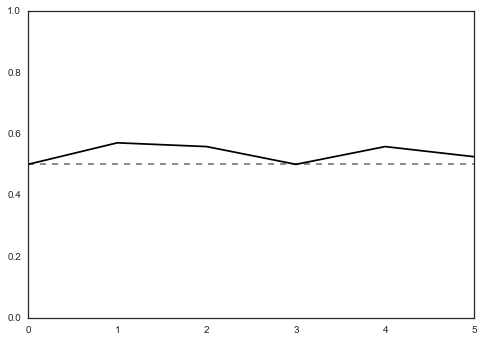

In [11]:
fig, ax = plt.subplots()
ax.plot([0, 5], [.5, .5], '--', color='gray')
ax.plot(arr, color='black')
ax.set_ylim(0,1)
plt.show()

# Basic predictions

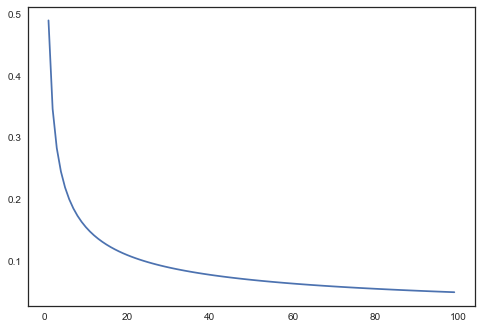

In [2]:
p = .6
N = np.arange(1,100)
plt.plot(N,np.sqrt(N*p*(1-p))/N)

In [667]:
problems[1]

array([[[ 3.  ,  0.25],
        [ 0.  ,  0.75]],

       [[ 4.  ,  0.2 ],
        [ 0.  ,  0.8 ]]])

In [5]:
drift = 'cpt'
theta = 3
tau = 0
p_stay = 0.3

pars = {'theta': theta,
        'tau': tau,
        'p_stay': p_stay,
        'sc': 1,
        'max_T': 100,
        'minsamplesize': 2}
m = CHASEModel(drift=drift,
               startdist='laplace',
               problems=problems)

pid = 3
pars['amp'] = False
no_amp = m(problems[pid], pars)

pars['amp'] = True
amp = m(problems[pid], pars)

AssertionError: Number of states does not follow from theta

In [60]:
print no_amp['p_resp']
print amp['p_resp']

[ 0.25503801  0.74496199]
[ 0.28748655  0.71251345]


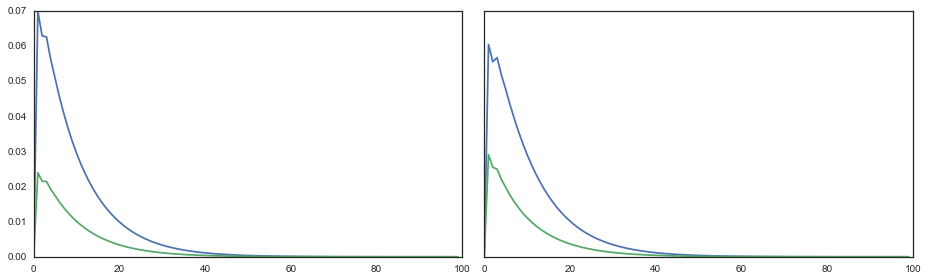

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(13,4), sharey=True)
ax[0].plot(no_amp['p_resp_t'][:,1])
ax[0].plot(no_amp['p_resp_t'][:,0])

ax[1].plot(amp['p_resp_t'][:,1])
ax[1].plot(amp['p_resp_t'][:,0])

plt.tight_layout()
plt.show()

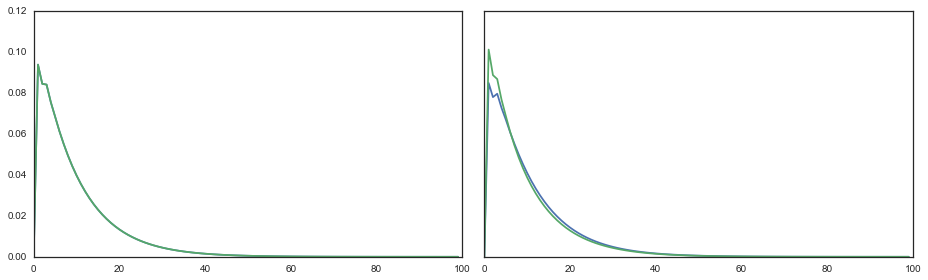

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(13,4), sharey=True)
ax[0].plot(no_amp['p_stop_cond'][:,1])
ax[0].plot(no_amp['p_stop_cond'][:,0])

ax[1].plot(amp['p_stop_cond'][:,1])
ax[1].plot(amp['p_stop_cond'][:,0])

plt.tight_layout()
plt.show()

In [65]:
dr_constant = []
dr = {pid: [] for pid in range(6)}
for pid in range(6):
    
    pars = {'theta': theta,
            'tau': tau,
            'p_stay': p_stay,
            'max_T': 100}
    dr_constant.append(m.drift(problems[pid], pars))

    for i in range(1,100):
        pars = {'theta': theta,
                'tau': tau,
                'p_stay': p_stay,
                'max_T': 100,
                't': i}
        dr[pid].append(m.drift(problems[pid], pars))

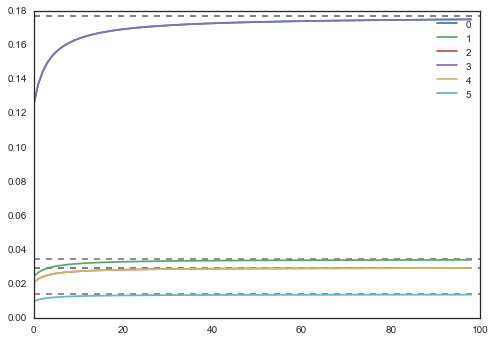

In [66]:
fig, ax = plt.subplots()
for pid in range(6):
    ax.plot([0,100], [dr_constant[pid], dr_constant[pid]],'--',color='gray')
    ax.plot(dr[pid], label=pid)
ax.legend()
plt.show()

In [460]:
problems

{0: array([[[ 3. ,  1. ],
         [ 0. ,  0. ]],
 
        [[ 4. ,  0.8],
         [ 0. ,  0.2]]]), 1: array([[[ 3.  ,  0.25],
         [ 0.  ,  0.75]],
 
        [[ 4.  ,  0.2 ],
         [ 0.  ,  0.8 ]]]), 2: array([[[-32. ,   0.1],
         [  0. ,   0.9]],
 
        [[ -3. ,   1. ],
         [  0. ,   0. ]]]), 3: array([[[-4. ,  0.8],
         [ 0. ,  0.2]],
 
        [[-3. ,  1. ],
         [ 0. ,  0. ]]]), 4: array([[[  3. ,   1. ],
         [  0. ,   0. ]],
 
        [[ 32. ,   0.1],
         [  0. ,   0.9]]]), 5: array([[[  3.00000000e+00,   2.50000000e-01],
         [  0.00000000e+00,   7.50000000e-01]],
 
        [[  3.20000000e+01,   2.50000000e-02],
         [  0.00000000e+00,   9.75000000e-01]]])}

In [414]:
arr = np.genfromtxt('data/six_problems.csv', delimiter=',')
problems = {i: arr[i].reshape((2,2,2)) for i in range(len(arr))}

In [408]:
drift = 1
theta = 4
tau = 1
p_stay = 0

pars = {'theta': theta,
        'tau': tau,
        'p_stay': p_stay,
        'stepsize': 1,
        'max_T': 100}
m = CHASEModel(drift=drift,
               startdist='laplace',
               problems=problems)

result = m(problems[0], pars)


pars = {'theta': theta,
        'tau': tau,
        'p_stay': p_stay,
        'stepsize': .25,
        'max_T': 100}
m = CHASEModel(drift=drift,
               startdist='laplace',
               problems=problems)
result_step = m(problems[0], pars)

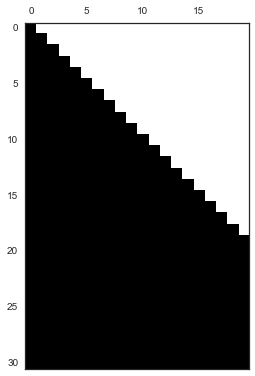

In [409]:
plt.matshow(result_step['states_t'][:20,:].transpose())

In [410]:
print np.round(result['p_resp'], 3)
print np.round(result_step['p_resp'], 3)

[ 0.  1.]
[ 0.  1.]


In [411]:
#print result['p_stop_cond'].sum(axis=0)
#print result_step['p_stop_cond'].sum(axis=0)
print result['exp_samplesize']
print result_step['exp_samplesize']

[[ nan   4.]]
[[ nan   4.]]


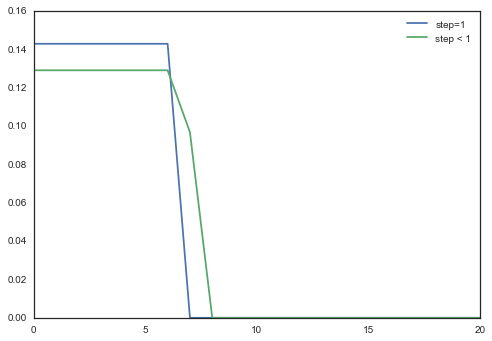

In [412]:
fig, ax = plt.subplots()
ax.plot(result['p_stop_cond'][:,1], '-', label='step=1')
ax.plot(result_step['p_stop_cond'][:,1], '-', label='step < 1')
ax.set_xlim(0, 20)
ax.legend()
plt.show()

In [55]:
thetas = [2, 6]
drifts = np.arange(-.999, .999, .01)
ss = {}
pH = {}
for theta in thetas:
    ss[theta] = []
    pH[theta] = []
    for drift in drifts:
        pars = {'theta': theta,
                'p_stay': 0,
                'tau': 0}
        m = CHASEModel(drift=drift,
                       startdist='laplace')
        result = m({}, pars)
        pH[theta].append(result['p_resp'][1])
        ss[theta].append(result['p_stop_cond'])
    ss[theta] = np.array(ss[theta])

quants = {theta: np.array([pred_quantiles(ss_i[:,1]) for ss_i in ss[theta]]) for theta in thetas}

In [50]:
sns.set_style("whitegrid")
from mypy.viz import tableau20
FIGDEST = '/Users/markant/Dropbox/Apps/ShareLaTeX/CHASE Paper/figures'

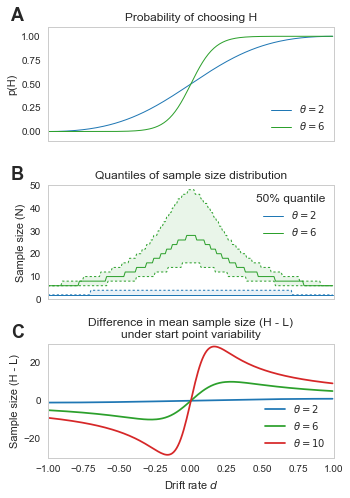

In [56]:
#cols = [(0,0,0), (.3,.3,.3), (.6,.6,.6)]
cols = [tableau20[0], tableau20[4], tableau20[6]]

fig, axi = plt.subplots(3, 1, figsize=(5,7), sharex=True)

ax = axi[0]
for i, theta in enumerate(thetas):
    ax.plot(drifts, pH[theta], color=cols[i], label=r'$\theta=%s$' % theta, linewidth=1.)
ax.legend(loc='lower right')
ax.set_ylim(-.1, 1.1)
ax.set_ylabel('p(H)')
ax.set_title('Probability of choosing H')
ax.text(-.13, 1.05, 'A', fontsize=18, fontweight='semibold', transform=ax.transAxes)



ax = axi[1]

for i, theta in enumerate(thetas):
    ax.fill_between(drifts, quants[theta][:,0], quants[theta][:,2], facecolor=cols[i], alpha=.1)
    ax.plot(drifts, quants[theta][:,1], '-', color=cols[i], label=r'$\theta=%s$' % theta, linewidth=1.)
    ax.plot(drifts, quants[theta][:,0], ':', color=cols[i], linewidth=1.)
    ax.plot(drifts, quants[theta][:,2], ':', color=cols[i], linewidth=1.)


ax.set_ylim(0, 50)
ax.set_ylabel('Sample size (N)')
#ax.set_xlabel(r'Drift rate $d$')
ax.set_title('Quantiles of sample size distribution')
ax.legend(title='50% quantile')
ax.text(-.13, 1.05, 'B', fontsize=18, fontweight='semibold', transform=ax.transAxes)



ax = axi[2]
for i, theta in enumerate([2, 6, 10]):
    diffs = ssdf[ssdf.theta==theta]['ss(H - L)'].values
    ax.plot(dr, diffs, label=r'$\theta=%s$' % theta, color=cols[i])
ax.set_ylim(-30, 30)
ax.set_xlim(-1, 1)
ax.set_xlabel(r'Drift rate $d$')
ax.set_ylabel('Sample size (H - L)')
ax.set_title('Difference in mean sample size (H - L)\nunder start point variability')
ax.legend(loc='lower right')
ax.text(-.13, 1.05, 'C', fontsize=18, fontweight='semibold', transform=ax.transAxes)

for ax in axi:
    ax.grid(None)


plt.tight_layout()
plt.show()
fig.savefig('%s/predictions_by_drift.pdf' % FIGDEST, bbox_inches='tight')

# Start point variability and difference in sample sizes

In [11]:
tau = 1
arr = []
thetas = [2, 6, 10]
dr = np.arange(-1, 1, .01)
for drift in dr:
    for theta in thetas:
        m = CHASEModel(drift=drift,
                       startdist='laplace')
        pars = {'theta': theta,
                'p_stay': 0.,
                'tau': tau,
                'pref_units': 'diffs',
                'sc': 1,
                'p_sample_H': .5}

        
        r = m({}, pars)
        ss = np.array(r['exp_samplesize'])[0]
        arr.append([theta, drift, ss[0], ss[1], ss[1] - ss[0]])

/Users/markant/code/chase/chase/base.py:107: RuntimeWarning: invalid value encountered in divide
  exp_samplesize = self.dt*(Z*(IQ*IQ)*R)/p_resp
/Users/markant/code/chase/chase/base.py:179: RuntimeWarning: invalid value encountered in divide
  p_stop_cond = np.array([pt/p_resp for pt in p_resp_t]).reshape((self.max_T/self.dt, 2))


In [12]:
ssdf = pd.DataFrame(arr, columns=['theta', 'd', 'ss(L)', 'ss(H)', 'ss(H - L)'])

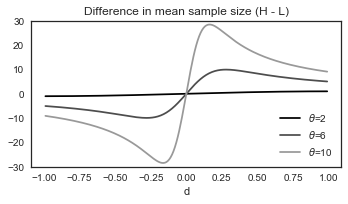

In [13]:
cols = [(0,0,0), (.3,.3,.3), (.6,.6,.6)]
fig, ax = plt.subplots(figsize=(5,3))
for i, theta in enumerate(thetas):
    diffs = ssdf[ssdf.theta==theta]['ss(H - L)'].values
    ax.plot(dr, diffs, label=r'$\theta$=%s' % theta, color=cols[i])
ax.set_ylim(-30, 30)
ax.set_xlabel('d')
ax.set_title('Difference in mean sample size (H - L)')
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()
#fig.savefig('%s/sample_size_difference.pdf' % FIGDEST, bbox_inches='tight')

# Modeling drift rate with CPT

In [3]:
from chase.cpt import value_fnc

def prelec(p, prelec_elevation, prelec_gamma):
    return np.exp(-prelec_elevation * ((-np.log(p)) ** prelec_gamma))

In [ ]:
labels = ['HBWE04', 'HPKH08, Exp. 1', 'HPKH08, Exp. 2']
col = ['red', 'blue', 'purple']



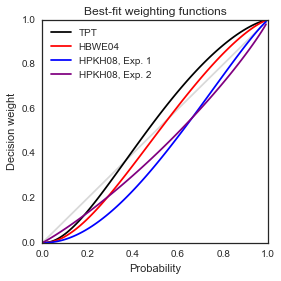

In [15]:
fig, ax = plt.subplots(figsize=(4, 4))

p = np.arange(0, 1, .01)
axi = ax
axi.plot([0, 1], [0, 1], color='gray', alpha=.3)
axi.plot(p, prelec(p, 1., 1.41), color='black', label='TPT')
axi.plot(p, prelec(p, 1.19, 1.32), color='red', label='HBWE04')
axi.plot(p, prelec(p, 1.61, 1.15), color='blue', label='HPKH08, Exp. 1')
axi.plot(p, prelec(p, 1.3, .91), color='purple', label='HPKH08, Exp. 2')
axi.set_title('Best-fit weighting functions')
axi.legend(loc='upper left')
axi.set_xlabel('Probability')
axi.set_ylabel('Decision weight')
plt.tight_layout()
plt.show()
fig.savefig('/Users/markant/Dropbox/sharelatex/ssDFE/ssDFEpsychrev_v0/figures/bf_weighting_functions.pdf', 
            bbox_inches='tight')

In [3]:
# derivative of weighting function
def w(p, delta, gamma):
    return (delta*gamma/p) * ((-np.log(p)) ** (gamma - 1)) * prelec(p, delta, gamma)

In [8]:
from matplotlib import gridspec

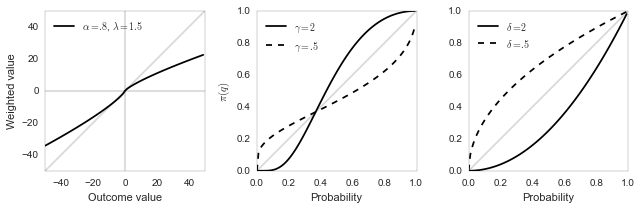

In [110]:
fig = plt.figure(figsize=(9, 3))
gs = gridspec.GridSpec(1,3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2], sharey=ax2)
#fig, ax = plt.subplots(1, 3, figsize=(9, 3))

b = 50
axi = ax1
axi.plot([-b, b], [0, 0], color='gray', alpha=.3)
axi.plot([0, 0], [-b, b], color='gray', alpha=.3)
axi.plot([-b, b], [-b, b], color='gray', alpha=.3)

x = np.arange(-b, b)
axi.plot(x, value_fnc(x, {'pow_gain': 0.8, 'w_loss': 1.5}), color='black',
         label=r'$\alpha=.8$, $\lambda=1.5$')

axi.set_xlim(-b, b)
axi.set_ylim(-b, b)
#axi.set_title('Value weighting')
axi.set_xlabel('Outcome value')
axi.set_ylabel('Weighted value')
axi.legend(loc='upper left')

p = np.arange(0, 1, .01)
axi = ax2
axi.plot([0, 1], [0, 1], color='gray', alpha=.3)
axi.plot(p, prelec(p, 1., 2.), color='black', label=r'$\gamma=2$')
axi.plot(p, prelec(p, 1., 0.5), '--', color='black', label=r'$\gamma=.5$')
#axi.set_title('Decision weighting function')
axi.legend(loc='upper left')
axi.set_xlabel('Probability')
axi.set_ylabel(r'$\pi(q)$')

axi = ax3
axi.plot([0, 1], [0, 1], color='gray', alpha=.3)
axi.plot(p, prelec(p, 2, 1), color='black', label=r'$\delta=2$')
axi.plot(p, prelec(p, .5, 1), '--', color='black', label=r'$\delta=.5$')
#axi.set_title('Decision weighting function')
axi.legend(loc='upper left')
axi.set_xlabel('Probability')

#axi.set_ylabel(r'$\pi(q)$')


#axi.plot([0, 1], [1, 1], color='gray', alpha=.3)
#axi.plot(p, w(p, 1., 2.), color='black', label=r'$\gamma=2$')
#axi.plot(p, w(p, 1., .5), '--', color='black', label=r'$\gamma=.5$')
#axi.set_title('Sequential decision weights')
#axi.legend(loc='upper left')
#axi.set_xlabel('Probability')
#axi.set_ylabel('Decision weight')

for axi in [ax1, ax2, ax3]:
    for i in axi.spines.itervalues():
        i.set_linewidth(.2)

plt.tight_layout()
plt.show()
fig.savefig(FIGDEST+'weighting_functions.pdf', bbox_inches='tight')

In [4]:
from mypy.viz import tableau20

In [5]:
FIGDEST = '/Users/markant/Box Sync/Presentations/2016.05.12_ARC_Minicon/'

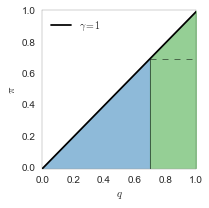

In [8]:
fig, ax = plt.subplots(figsize=(3, 3))

qs = [.7, 1.]

delta = 1
gamma = 1

axi = ax

cols = [tableau20[0], tableau20[4]]
als = [.5, .5]

for i, q in enumerate(qs):

    if i==0:
        p0 = 0
    else:
        p0 = qs[i-1]
    p = np.arange(p0, q+.01, .01)
    w = prelec(q, delta, gamma)
    
    axi.plot([q, q], [0, w], '-', color='black', linewidth=.5)
    axi.plot([q, 1], [w, w], '--', color='black', linewidth=.5)
    axi.fill_between(p, [prelec(x, delta, gamma) for x in p], 
                     color=cols[i], alpha=als[i])


#axi.plot([1, 1], [0, 1], '-', color='gray')
#axi.plot([0, 1], [1, 1], '-', color='gray')


p = np.arange(0, 1+.01, .01)
axi.plot(p, prelec(p, delta, gamma), color='black', label=r'$\gamma=1$')
#axi.set_title('Decision weighting function')
axi.legend(loc='upper left')
axi.set_xlabel('$q$')
axi.set_ylabel(r'$\pi$')
axi.set_xlim(0,1)
axi.set_ylim(-.001,1.01)

for i in axi.spines.itervalues():
    i.set_linewidth(.2)

plt.tight_layout()
plt.show()
fig.savefig(FIGDEST+'weighting_example_linear.pdf', bbox_inches='tight')

# Attentional weighting

In [82]:
from chase.cpt import value_fnc

def prelec(p, prelec_elevation, prelec_gamma):
    return np.exp(-prelec_elevation * ((-np.log(p)) ** prelec_gamma))

# derivative of weighting function
def w(p, delta, gamma):
    return (delta*gamma/p) * ((-np.log(p)) ** (gamma - 1)) * prelec(p, delta, gamma)

In [73]:
ps = np.arange(.01, 1.01, .01)

In [80]:
xs = np.arange(1, 100)

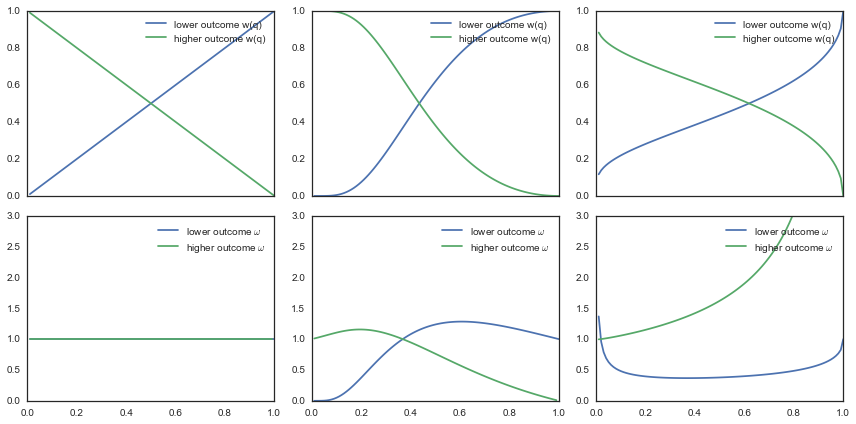

In [71]:
qs = np.arange(.01, 1.01, .01)
fig, axi = plt.subplots(2, 3, figsize=(12,6), sharex=True)

gamma = 1
delta = 1
ax = axi[0][0]

w_low = np.array([prelec(q, delta, gamma) for q in qs])
w_high = np.array([(1 - prelec(q, delta, gamma)) for q in qs])

ax.plot(qs, [prelec(q, delta, gamma) for q in qs], label='lower outcome w(q)')
ax.plot(qs, [(1 - prelec(q, delta, gamma)) for q in qs], label='higher outcome w(q)')
ax.legend()
ax.set_xlim(0,1)
ax.set_ylim(0, 1)

gamma = 2
delta = 1
ax = axi[0][1]

w_low = np.array([prelec(q, delta, gamma) for q in qs])
w_high = np.array([(1 - prelec(q, delta, gamma)) for q in qs])

ax.plot(qs, [prelec(q, delta, gamma) for q in qs], label='lower outcome w(q)')
ax.plot(qs, [(1 - prelec(q, delta, gamma)) for q in qs], label='higher outcome w(q)')
ax.legend()
ax.set_xlim(0,1)
ax.set_ylim(0, 1)

gamma = .5
delta = 1
ax = axi[0][2]

w_low = np.array([prelec(q, delta, gamma) for q in qs])
w_high = np.array([(1 - prelec(q, delta, gamma)) for q in qs])

ax.plot(qs, [prelec(q, delta, gamma) for q in qs], label='lower outcome w(q)')
ax.plot(qs, [(1 - prelec(q, delta, gamma)) for q in qs], label='higher outcome w(q)')
ax.legend()
ax.set_xlim(0,1)
ax.set_ylim(0, 1)

gamma = 1
delta = 1
ax = axi[1][0]
ax.plot(qs, [prelec(q, delta, gamma) / q for q in qs], label=r'lower outcome $\omega$')
ax.plot(qs, [(1 - prelec(q, delta, gamma)) / (1 - q) for q in qs], label='higher outcome $\omega$')
ax.legend()
ax.set_xlim(0,1)
ax.set_ylim(0, 3)

gamma = 2
delta = 1
ax = axi[1][1]
ax.plot(qs, [prelec(q, delta, gamma) / q for q in qs], label=r'lower outcome $\omega$')
ax.plot(qs, [(1 - prelec(q, delta, gamma)) / (1 - q) for q in qs], label='higher outcome $\omega$')
ax.legend()
ax.set_xlim(0,1)
ax.set_ylim(0, 3)

gamma = .5
delta = 2
ax = axi[1][2]

om_low = np.array([prelec(q, delta, gamma) / q for q in qs])
om_high = np.array([(1 - prelec(q, delta, gamma)) / (1 - q) for q in qs])

#print om_low/om_high

ax.plot(qs, om_low, label=r'lower outcome $\omega$')
ax.plot(qs, om_high, label='higher outcome $\omega$')
ax.legend()
ax.set_xlim(0,1)
ax.set_ylim(0, 3)



plt.tight_layout()
plt.show()

In [83]:
from scipy.stats import binom

In [114]:
delta = 1
gamma = 2
p1 = .7

res = []
for ss in range(1, 40):
    
    # first outcome
    arr = []
    for n_low in range(ss + 1):
        prop_low = n_low/float(ss)
        n_high = ss - n_low
        
        w_low = prelec(prop_low, delta, gamma)
        w_high = 1 - w_low
        
        arr.append([w_low, w_high, binom.pmf(n_low, ss, p1)])
    arr = np.array(arr)
    x1_mn = np.dot(arr[:,0], arr[:,2])
    x1_sd = np.sqrt(np.dot((arr[:,0] - x1_mn)**2, arr[:,2]))

    x2_mn = np.dot(arr[:,1], arr[:,2])
    x2_sd = np.sqrt(np.dot((arr[:,1] - x2_mn)**2, arr[:,2]))

    res.append([delta, gamma, ss, x1_mn, x1_sd, x2_mn, x2_sd])

df = pd.DataFrame(res, columns=['delta', 'gamma', 'N', 
                                'x1_w_mn', 'x1_w_sd', 'x2_w_mn', 'x2_w_sd'])

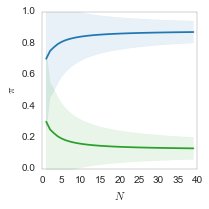

In [122]:
fig, ax = plt.subplots(figsize=(3,3))

cols = [tableau20[0], tableau20[4]]
al = .1

ax.plot(range(1, 40), df['x1_w_mn'], color=cols[0])
ax.fill_between(range(1, df['x1_w_mn'].values.shape[0] + 1), 
                df['x1_w_mn'].values - df['x1_w_sd'].values, 
                df['x1_w_mn'].values + df['x1_w_sd'].values, 
                alpha=al, color=cols[0])


ax.plot(range(1, 40), df['x2_w_mn'], color=cols[1])
ax.fill_between(range(1, df['x2_w_mn'].values.shape[0] + 1), 
                df['x2_w_mn'].values - df['x2_w_sd'].values, 
                df['x2_w_mn'].values + df['x2_w_sd'].values, 
                alpha=al, color=cols[1])

ax.set_ylabel('$\pi$')
ax.set_xlabel('$N$')
ax.set_ylim(0, 1)

for i in ax.spines.itervalues():
    i.set_linewidth(.2)

plt.tight_layout()
plt.show()
fig.savefig(FIGDEST+'weighting_sequential.pdf', bbox_inches='tight')

# CPT parameterizations: Risky vs. safe preference

In [27]:
def expected_value(opt):
    return np.dot(opt[:,0], opt[:,1])

In [120]:
R = np.array([[1., .6],
              [4., .2],
              [16., .1],
              [40., .1]])
S = np.array([[expected_value(R), 1.],
              [0., 0.],
              [0., 0.],
              [0., 0.]])
options = np.array([S, R])
print options
print map(expected_value, options)

[[[  7.    1. ]
  [  0.    0. ]
  [  0.    0. ]
  [  0.    0. ]]

 [[  1.    0.6]
  [  4.    0.2]
  [ 16.    0.1]
  [ 40.    0.1]]]
[7.0, 7.0]


In [121]:
m = model(drift='cpt',
               startdist='indifferent')

theta = 5

results = {}

# objective
print 'objective'
pars = {'theta': theta,
        'p_stay': .3}
results['baseline'] = m(options, pars)


# value function
print 'value'
pars = {'theta': theta,
        'p_stay': .3,
        'pow_gain': .5}
results['value'] = m(options, pars)


# overweighting
print 'over'
pars = {'theta': theta,
        'p_stay': .3,
        'prelec_gamma': 0.5}
results['over'] = m(options, pars)


# underweighting
print 'under'
pars = {'theta': theta,
        'p_stay': .3,
        'prelec_gamma': 1.7}
results['under'] = m(options, pars)


for label in ['baseline', 'value', 'over', 'under']:
    print label, np.round(results[label]['p_resp'], 4)

objective
gains
   index  id  outcome  pr  w
0      1   1        0   0  0
1      2   2        0   0  0
2      3   3        0   0  0
3      0   0        7   1  1
gains
   index  id  outcome   pr    w
0      0   0        1  0.6  0.6
1      1   1        4  0.2  0.2
2      2   2       16  0.1  0.1
3      3   3       40  0.1  0.1
[ 7.  7.] 140.4
value
gains
   index  id  outcome  pr  w
0      1   1        0   0  0
1      2   2        0   0  0
2      3   3        0   0  0
3      0   0        7   1  1
gains
   index  id  outcome   pr    w
0      0   0        1  0.6  0.6
1      1   1        4  0.2  0.2
2      2   2       16  0.1  0.1
3      3   3       40  0.1  0.1
[ 2.64575131  2.03245553] 2.86912451031
over
gains
   index  id  outcome  pr  w
0      1   1        0   0  0
1      2   2        0   0  0
2      3   3        0   0  0
3      0   0        7   1  1
gains
   index  id  outcome   pr         w
0      0   0        1  0.6  0.616045
1      1   1        4  0.2  0.102740
2      2   2       16

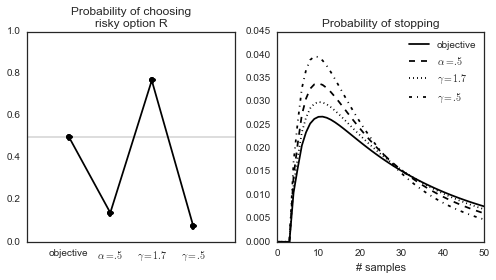

In [130]:
labels = ['baseline', 'value', 'over', 'under']

styl = ['-', '--', ':', '-.']
plotlabels=['objective', r'$\alpha=.5$', r'$\gamma=1.7$', r'$\gamma=.5$']


fig, ax = plt.subplots(1, 2, figsize=(7,4))

axi = ax[0]

axi.plot([0, 5], [.5, .5], color='gray', alpha=.3)
axi.plot(range(1, 5), [results[label]['p_resp'][1] for label in labels], '-o', color='black')
axi.set_ylim(0, 1)
axi.set_title('Probability of choosing\nrisky option R')
axi.set_xticks(range(1, 5))
axi.set_xticklabels(plotlabels)

axi = ax[1]
for i, label in enumerate(labels):
    axi.plot(results[label]['p_stop_cond'][:,0], styl[i], color='black', label=plotlabels[i])
axi.set_xlim(0, 50)
axi.legend()
axi.set_ylim(0, .045)
axi.set_xlabel('# samples')
axi.set_title('Probability of stopping')
plt.tight_layout()
plt.show()

fig.savefig(FIGDEST+'cpt_function_effects.pdf', bbox_inches='tight')

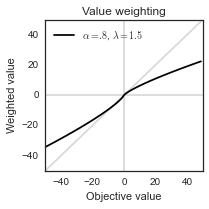

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

b = 50
axi = ax
axi.plot([-b, b], [0, 0], color='gray', alpha=.3)
axi.plot([0, 0], [-b, b], color='gray', alpha=.3)
axi.plot([-b, b], [-b, b], color='gray', alpha=.3)

x = np.arange(-b, b)
axi.plot(x, value_fnc(x, {'pow_gain': 0.8, 'w_loss': 1.5}), color='black',
         label=r'$\alpha=.8$, $\lambda=1.5$')

axi.set_xlim(-b, b)
axi.set_ylim(-b, b)
axi.set_title('Value weighting')
axi.set_xlabel('Objective value')
axi.set_ylabel('Weighted value')
axi.legend(loc='upper left')
plt.tight_layout()
plt.show()
fig.savefig(FIGDEST+'cpt_value.pdf', bbox_inches='tight')

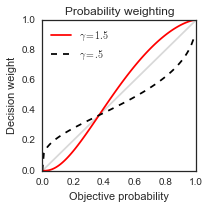

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
axi = ax
p = np.arange(0, 1, .01)
axi.plot([0, 1], [0, 1], color='gray', alpha=.3)
axi.plot(p, prelec(p, 1., 1.5), color='red', label=r'$\gamma=1.5$')
axi.plot(p, prelec(p, 1., 0.5), '--', color='black', label=r'$\gamma=.5$')
axi.set_title('Probability weighting')
axi.legend(loc='upper left')
axi.set_xlabel('Objective probability')
axi.set_ylabel('Decision weight')
plt.tight_layout()
plt.show()

fig.savefig(FIGDEST+'cpt_prelec_gap.pdf', bbox_inches='tight')

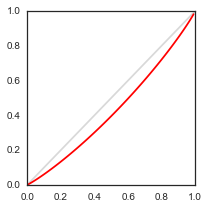

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
axi = ax
p = np.arange(0, 1, .01)
axi.plot([0, 1], [0, 1], color='gray', alpha=.3)
#axi.plot(p, prelec(p, 1., 1.41), color='red')
#axi.plot(p, prelec(p, 1.61, 1.15), color='red')
axi.plot(p, prelec(p, 1.30, .92), color='red')
plt.tight_layout()
plt.show()

fig.savefig(FIGDEST+'bf_prelec_hau_exp2.pdf', bbox_inches='tight')